In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.backend import tensorflow_backend as backend
import math
from sklearn.preprocessing import StandardScaler

In [0]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
#         print(root) #path
#         print(dirs) #subdirectory
#         print(files) #files in non-subdirectory
    return dic

In [0]:
AutomaticExtractionData=file_name("AutomaticExtractionData_IMUZCenter")
ManualExtractionData=file_name("ManualExtractionData")
ManualExtractionData_name=list(ManualExtractionData.keys())[1:]
label=pd.read_csv('./IDGenderAgelist_ig.csv',dtype='object')

In [0]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x
      
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [0]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))

In [0]:
def generate_read_table(fileName,actionName,ID,label): 
  try:
    dataset_name= fileName + actionName
    path_name= fileName +'/'+ str(label[label['ID']==ID][dataset_name].values[0])
    if fileName=='ManualExtractionData/Android':
      df=pd.read_csv(path_name,skiprows=2)
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    else:
      df=pd.read_csv(path_name,skiprows=2)
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df = df.astype(float)
    return df
  except:
    return None
  
  return df
df = generate_read_table('AutomaticExtractionData_IMUZCenter','_Walk_1','002318',label)

In [14]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az
0,0.236353,-0.627744,0.041949,-0.024,-0.826,0.150
0,0.177763,-0.622424,-0.053925,0.006,-0.834,0.148
1,0.044605,-0.638404,-0.181756,0.028,-0.824,0.148
2,-0.045942,-0.670364,-0.309588,0.040,-0.822,0.084
3,-0.056595,-0.643724,-0.384157,0.060,-0.844,0.026


In [0]:
def yipeng_preprocessing(raw_data, target_class, length):
            
  # Data augmentation
  if raw_data.shape[0] > length:
    data = raw_data[0:length] # Cut the data
  else:
    period = math.ceil(length / raw_data.shape[0])
    temp = np.copy(raw_data)
    # copy the data periodic
    for i in range(period-1):
      temp = np.row_stack((temp, raw_data))
      data = (temp[0:length]) # Cut the data
            
  return data, target_class

In [0]:
df = pd.read_csv('IDGenderAgelist_ig.csv')
ids = df["ID"].values
y = df["Gender(0:Female;1:Male)"].values

In [0]:
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Bidirectional, Dropout, Flatten, Dense, TimeDistributed, GlobalMaxPooling1D, Conv2D, Reshape
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

#Deep Convoluional LSTM model

def get_model(n_timesteps,n_features):
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', input_shape=(n_timesteps, n_features), activation='relu'))
  model.add(MaxPooling1D(2, padding='same'))
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D(2, padding='same'))
  model.add(Conv1D(128, 8, padding='same', activation='relu'))
  model.add(Conv1D(64, 8, padding='same', activation='tanh'))
  model.add(Bidirectional(LSTM(100,return_sequences=True)))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dropout(0.5))
  #model.add(Flatten())
  #model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [21]:
num_gen = 3
ls_acc = []
length = 1000

datasets = label.columns[4:]
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']

skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(ids, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    ids_train, ids_test = ids[train_index], ids[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ids_train, ids_valid, y_train, y_valid = train_test_split(ids_train, y_train, test_size=0.10, random_state=42)
    
    x_train = []
    new_y_train = []
    for i in tqdm(range(0,len(ids_train))):
        subject_id = change_ID_number(str(ids_train[i]))
        for k in range(0,len(file_name)):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    temp_x, temp_y = yipeng_preprocessing(df_subject.values, y_train[i], length)
                    x_train.append(temp_x)
                    new_y_train.append(temp_y)
                except: 
                    continue
    x_valid = []
    new_y_valid = []
    for i in tqdm(range(0,len(ids_valid))):
        subject_id = change_ID_number(str(ids_valid[i]))
        for k in range(0,len(file_name)):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    temp_x, temp_y = yipeng_preprocessing(df_subject.values, y_valid[i], length)
                    x_valid.append(temp_x)
                    new_y_valid.append(temp_y)
                except:
                    continue
                    
    x_test = []
    new_y_test = []
    for i in tqdm(range(0,len(ids_test))):
        subject_id = change_ID_number(str(ids_test[i]))
        for k in range(0,len(file_name)):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    temp_x, temp_y = yipeng_preprocessing(df_subject.values, y_test[i], length)
                    x_test.append(temp_x)
                    new_y_test.append(temp_y)
                except:
                    continue
    print("Train size: " + str(len(x_train)))
    print("Valid size: " + str(len(x_valid)))
    print("Test size: " + str(len(x_test)))
    
    x_train = np.array(x_train)
    x_valid = np.array(x_valid)
    x_test = np.array(x_test)
    y_train = np.array(new_y_train)
    y_valid = np.array(new_y_valid)
    y_test = np.array(new_y_test)
    
    model = get_model(x_train.shape[1],x_train.shape[2])
    result = model.fit(x_train, y_train, validation_data = (x_valid,y_valid),epochs= 20, batch_size = 256)
    y_pred = model.predict(x_test)

    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1

    ls_acc.append(accuracy_score(y_pred,y_test))
    print(accuracy_score(y_pred,y_test))
    backend.clear_session()
    
    break

  0%|          | 2/549 [00:00<00:48, 11.32it/s]

TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:10<00:00, 14.82it/s]


Train size: 6586
Valid size: 726
Test size: 1627
Train on 6586 samples, validate on 726 samples
Epoch 1/20
6586/6586 [==============================] - 81s 12ms/step - loss: 0.6933 - acc: 0.5208 - val_loss: 0.6876 - val_acc: 0.5565
Epoch 2/20
6586/6586 [==============================] - 74s 11ms/step - loss: 0.6810 - acc: 0.5638 - val_loss: 0.6766 - val_acc: 0.5620
Epoch 3/20
6586/6586 [==============================] - 73s 11ms/step - loss: 0.6337 - acc: 0.6488 - val_loss: 0.5883 - val_acc: 0.6846
Epoch 4/20
6586/6586 [==============================] - 74s 11ms/step - loss: 0.5514 - acc: 0.7265 - val_loss: 0.5536 - val_acc: 0.7328
Epoch 5/20
6586/6586 [==============================] - 74s 11ms/step - loss: 0.4829 - acc: 0.7691 - val_loss: 0.5728 - val_acc: 0.7287
Epoch 6/20
6586/6586 [==============================] - 74s 11ms/step - loss: 0.4450 - acc: 0.7968 - val_loss: 0.5968 - val_acc: 0.6804
Epoch 7/20
6586/6586 [==============================] - 74s 11ms/step - loss: 0.4185 - a

In [0]:
import matplotlib.pyplot as plt
plt.boxplot(ls_acc)
plt.savefig("result")

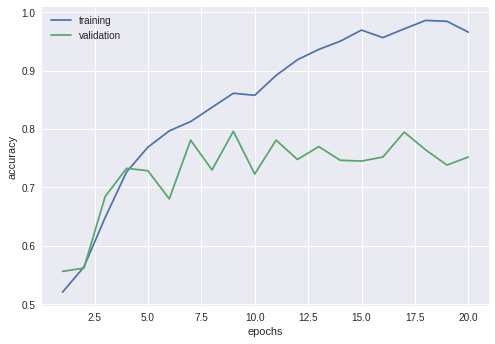

In [28]:
plt.plot(range(1, 20+1), result.history['acc'], label="training")
plt.plot(range(1, 20+1), result.history['val_acc'], label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

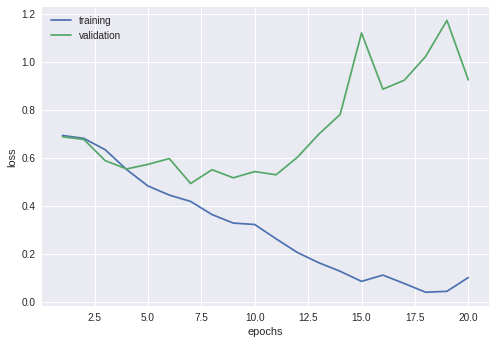

In [30]:
plt.plot(range(1, 20+1), result.history['loss'], label="training")
plt.plot(range(1, 20+1), result.history['val_loss'], label="validation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()